# A Step-by-Step Explanation of PCA on California Estates

### Import the libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the dataset 

In [3]:
data = pd.read_csv("C:/Users/m.bedioune/Downloads/a-step-by-step-explanation-of-pca-on-california-estates-example/California_Real_Estate.csv",
                 sep=';')
df_real_estate = data.copy()
df_real_estate

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
262,5,NaN,NaN,0,NaN,1239,322611,0
263,5,NaN,NaN,0,NaN,795,279191,0
264,5,NaN,NaN,0,NaN,1013,287997,0
265,5,NaN,NaN,0,NaN,1075,365869,0


### Discard the rows with NaN values

In [4]:
df_real_estate_nonull = df_real_estate[df_real_estate['Status'] == 1]
df_real_estate_nonull

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
191,1,2005.0,7.0,0,22.0,743,210745,1
192,1,2005.0,7.0,0,28.0,1160,331155,1
193,1,2005.0,7.0,0,34.0,626,204435,1
194,1,2005.0,7.0,0,37.0,756,189194,1


In [5]:
scaler = StandardScaler()
df_re_nonull_std = scaler.fit_transform(df_real_estate_nonull)

In [6]:
pca = PCA()
pca.fit_transform(df_re_nonull_std)

array([[-0.60734881,  1.31926442,  0.57906783, ..., -0.25542486,
         0.2337479 ,  0.        ],
       [-0.58105774,  1.34289556,  0.32392824, ..., -0.18273758,
         0.199292  ,  0.        ],
       [-1.8398805 , -0.1606641 , -0.29157809, ..., -0.71379278,
         0.2905317 ,  0.        ],
       ...,
       [-1.03970034,  1.18485044, -0.6530342 , ..., -0.00559872,
         0.19757116,  0.        ],
       [-0.76196533,  1.19268984, -0.64690188, ..., -0.00744995,
        -0.28604396,  0.        ],
       [-0.82936359,  1.09937408, -0.7236547 , ..., -0.01692015,
         0.20697981,  0.        ]])

In [7]:
pca.explained_variance_ratio_

array([0.30724715, 0.28117078, 0.15166089, 0.12851171, 0.09233419,
       0.03075947, 0.00831583, 0.        ])

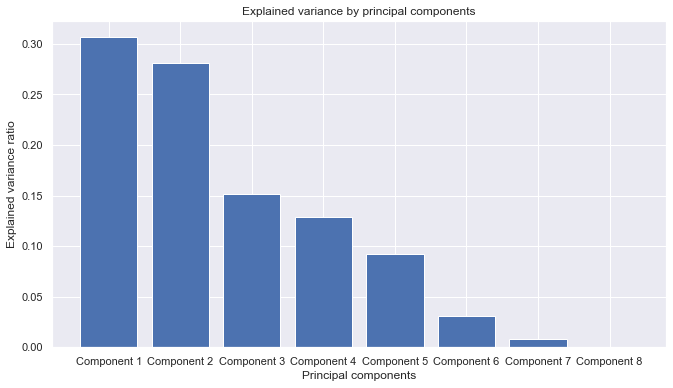

In [8]:
plt.figure(figsize = (11,6))
components = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6','Component 7','Component 8']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

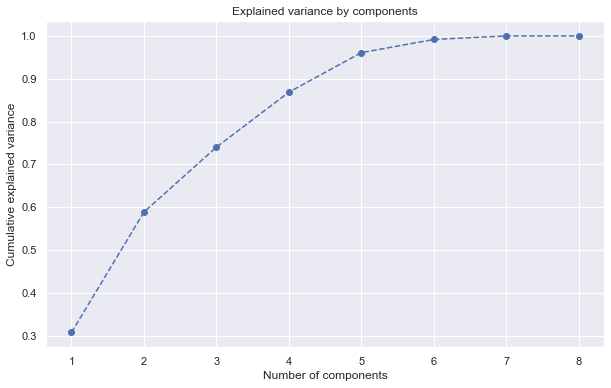

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# PCA Covariance Matrix in Jupyter – Analysis and Interpretation

In [10]:
pca = PCA(n_components=4)

In [11]:
pca.fit(df_re_nonull_std)

PCA(n_components=4)

In [12]:
pca.components_

array([[-0.01347829,  0.06534594, -0.06689355, -0.15099905,  0.39492744,
         0.63949973,  0.63509464,  0.        ],
       [-0.61576753, -0.62980998, -0.02208123,  0.4114363 , -0.15693164,
         0.12506318,  0.11888648,  0.        ],
       [ 0.2675697 , -0.06682334,  0.90927776,  0.22605443, -0.12937694,
         0.11386435,  0.1278709 , -0.        ],
       [ 0.26715037,  0.33315704, -0.3274807 ,  0.55432795, -0.56219835,
         0.20000856,  0.21689532,  0.        ]])

In [13]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                        columns=df_real_estate.columns.values,
                        index=['Component 1','Component 2','Component 3','Component 4'])
df_pca_comp

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
Component 1,-0.013478,0.065346,-0.066894,-0.150999,0.394927,0.639500,0.635095,0.0
Component 2,-0.615768,-0.629810,-0.022081,0.411436,-0.156932,0.125063,0.118886,0.0
Component 3,0.267570,-0.066823,0.909278,0.226054,-0.129377,0.113864,0.127871,-0.0
Component 4,0.267150,0.333157,-0.327481,0.554328,-0.562198,0.200009,0.216895,0.0


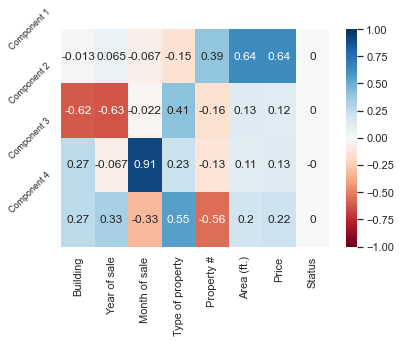

In [15]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1,2,3],
          ['Component 1','Component 2','Component 3','Component 4'],
          rotation=45,
          fontsize=9)

plt.show()